In [7]:
a = 1

if not "a" in globals():
        print("caralho")

if not "b" in globals():
        print("picao")

picao


In [6]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'a = 1\n\nprint("caralho") if "a" in locals()',
  'a = 1\n\n if "a" in locals():\n        print("caralho")\n\n if "b" in locals():\n        print("picao")',
  'a = 1\n\nif "a" in locals():\n        print("caralho")\n\nif "b" in locals():\n        print("picao")',
  'a = 1\n\nif "a" in global():\n        print("caralho")\n\nif "b" in global():\n        print("picao")',
  'a = 1\n\nif "a" in globals():\n        print("caralho")\n\nif "b" in globals():\n        print("picao")',
  'globals()'],
 '_oh': {},
 '_dh': ['T:\\$Nuvem\\GoogleDrive\\Colab Notebooks'],
 'In': ['',
  'a = 1\n\nprint("caralho") if "a" in locals()',
  'a = 1\n\n if "a" in locals():\n        print("caralho")\n\n if "b" in locals():\n        print

In [9]:
import os
from scipy.optimize import minimize
import numpy as np

T = np.random.normal(10)
x = np.random.normal(10)

p0 = 67.17

# Fake true parameters
a, b, c, d, e, f = np.random.uniform(-1, 1, size=6)

# targets
p = x * p0 + x * (1 - x) * (a + b * T + c * T ** 2 + d * x + e * x * T + f * x * T ** 2) * p0


def cav2(pars, T, x): # function p(T,x)
    a, b, c, d, e, f = pars
    return x * p0 + x * (1 - x) * (a + b * T + c * T ** 2 + d * x + e * x * T + f * x * T ** 2) * p0


def resid(pars, T, x):
    return ((p - cav2(pars, T, x)) ** 2).sum()


def constr(pars):
    return np.gradient(cav2(pars, T, x))

# this will force all parameters to be positive
bounds = [(0, None), (0, None), (0, None), (0, None), (0, None), (0, None)]
pars0 = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1], dtype=float)

res = minimize(resid, pars0, args=(T, x), method='L-BFGS-B', options={'maxiter': 50000}, bounds=bounds)

print("a = %f , b = %f, c = %f, d = %f, e = %f, f = %f" % (res.x[0], res.x[1], res.x[2], res.x[3], res.x[4], res.x[5]))


a = 0.100237 , b = 0.102295, c = 0.122208, d = 0.102599, e = 0.125159, f = 0.343508


In [11]:
np.random.normal(10)

9.2107044021481

In [12]:
import pandas as pd
import numpy as np
from scipy import optimize

df = pd.DataFrame({'prod': ['prod1', 'prod2', 'prod3', 'prod4', 'prod5', 'prod6'],
                   'cat': ['cat1', 'cat1', 'cat2', 'cat2', 'cat3', 'cat1'],
                   'dog': ['dog1', 'dog2', 'dog1', 'dog2', 'dog2', 'dog3'],
                   'result': [20, 10, 30, 50, 45, 120]})
df

prod   cat   dog  result
0  prod1  cat1  dog1      20
1  prod2  cat1  dog2      10
2  prod3  cat2  dog1      30
3  prod4  cat2  dog2      50
4  prod5  cat3  dog2      45
5  prod6  cat1  dog3     120

In [13]:
def animal_error(val, animal, df):
    assert len(val) == len(animal)
    lookup = dict()
    for i in range(len(val)):
        lookup[animal[i]] = val[i]
    df = df.replace(lookup)
    error = np.abs(df['result'] - np.multiply(df['cat'], df['dog']))
    return np.mean(error) / np.mean(df['result'])

In [16]:
animals = np.concatenate([df['dog'].unique(), df['cat'].unique()])
animals

array(['dog1', 'dog2', 'dog3', 'cat1', 'cat2', 'cat3'], dtype=object)

In [17]:
initial = np.repeat(np.sqrt(df['result'].mean()), animals.size)
initial

array([6.770032, 6.770032, 6.770032, 6.770032, 6.770032, 6.770032])

In [18]:
res = optimize.minimize(animal_error, args=(animals, df), x0=initial, method = 'Nelder-Mead', options={'maxiter':10000})
res_df = pd.DataFrame({'animal': animals, 'min_val':res.x})

res.fun

0.08676411624175694

In [19]:
res_df 

animal    min_val
0   dog1   3.754194
1   dog2   5.296533
2   dog3  22.526566
3   cat1   5.327044
4   cat2   9.307979
5   cat3   8.496109

In [21]:
import pandas as pd
from scipy.optimize import minimize
import numpy as np

def calc_func(x):
    return(x[0]-x[1])

x1 = [1,2,3]
x2 = [3,4,5]
v1 = pd.DataFrame([x1]).values[0]
v2 = pd.DataFrame([x2]).values[0]
x = np.array([v1,v2])
res = minimize(calc_func,x, method='BFGS')


c:\Prog\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1166: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (np.dot(yk, sk))


In [22]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [23]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [29]:
xdata = np.linspace(0, 4, 50)
xdata

array([0.        , 0.08163265, 0.16326531, 0.24489796, 0.32653061,
       0.40816327, 0.48979592, 0.57142857, 0.65306122, 0.73469388,
       0.81632653, 0.89795918, 0.97959184, 1.06122449, 1.14285714,
       1.2244898 , 1.30612245, 1.3877551 , 1.46938776, 1.55102041,
       1.63265306, 1.71428571, 1.79591837, 1.87755102, 1.95918367,
       2.04081633, 2.12244898, 2.20408163, 2.28571429, 2.36734694,
       2.44897959, 2.53061224, 2.6122449 , 2.69387755, 2.7755102 ,
       2.85714286, 2.93877551, 3.02040816, 3.10204082, 3.18367347,
       3.26530612, 3.34693878, 3.42857143, 3.51020408, 3.59183673,
       3.67346939, 3.75510204, 3.83673469, 3.91836735, 4.        ])

In [30]:
y = func(xdata, 2.5, 1.3, 0.5)
y

array([3.        , 2.7482863 , 2.52191652, 2.31833889, 2.13525857,
       1.97061177, 1.82254252, 1.6893817 , 1.56962823, 1.4619322 ,
       1.3650796 , 1.27797864, 1.19964749, 1.12920315, 1.06585153,
       1.0088785 , 0.95764182, 0.91156393, 0.87012542, 0.83285917,
       0.79934508, 0.76920538, 0.74210031, 0.71772432, 0.69580264,
       0.67608816, 0.65835864, 0.64241422, 0.62807518, 0.61517987,
       0.60358293, 0.59315363, 0.58377441, 0.57533955, 0.56775395,
       0.56093211, 0.55479713, 0.54927986, 0.54431809, 0.5398559 ,
       0.53584299, 0.53223412, 0.52898861, 0.52606988, 0.52344502,
       0.52108445, 0.51896155, 0.5170524 , 0.51533547, 0.51379141])

In [31]:
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
ydata

array([2.86253211, 2.58408736, 2.85238869, 2.20328028, 2.35505211,
       2.15580098, 1.62385977, 1.51773747, 1.58460558, 1.56780331,
       1.38926991, 1.23309392, 0.88831179, 1.14039132, 1.09814583,
       0.58195014, 0.97957583, 1.00016637, 0.94937867, 0.88281865,
       1.05904456, 0.51311865, 0.54700714, 0.66390699, 0.47465497,
       0.65048962, 0.53479316, 0.44458898, 0.05609672, 0.45631037,
       0.54242354, 0.93328116, 0.45668558, 0.57625432, 0.79441476,
       0.58926037, 0.97314073, 0.29536801, 0.39975342, 0.53597812,
       0.49927828, 0.30842097, 0.38933359, 0.9474868 , 0.5229339 ,
       0.60288646, 0.5756889 , 0.1270815 , 0.59254164, 0.55991963])

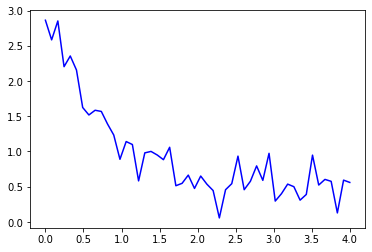

In [32]:
plt.plot(xdata, ydata, 'b-', label='data')

In [34]:
popt, pcov = curve_fit(func, xdata, ydata)
popt

array([2.55423706, 1.35190947, 0.47450618])

In [35]:
pcov

array([[ 0.0158905 ,  0.00681778, -0.0007614 ],
       [ 0.00681778,  0.02019919,  0.00541905],
       [-0.0007614 ,  0.00541905,  0.00282595]])

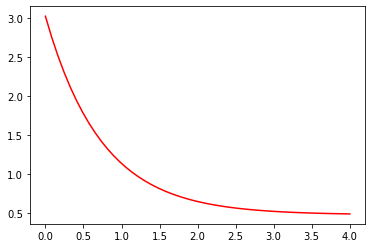

In [36]:
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

In [37]:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))

In [38]:
popt

array([2.43708906, 1.        , 0.35015434])

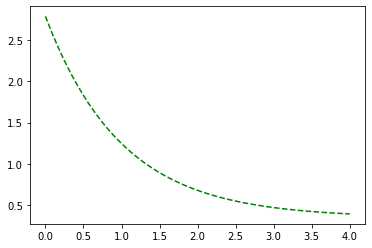

In [39]:
plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

No handles with labels found to put in legend.


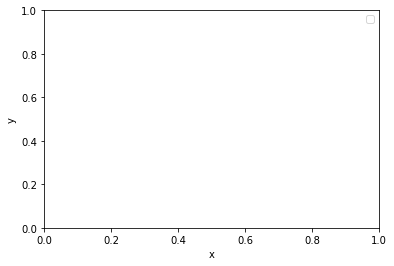

In [40]:
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()